# Effectiveness of Remote Employees📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->
Many companies, esspecially in the IT sector, allowed employees to work from home during covid and some have continued the trend. It is still unclear if employers should allow their employees to work from home. I find this esspecially interesting since I find that my productivity drops drastically when I am in office but as I understand it most people are far more productive in the office than at home. 

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->
Does working from home ultimately benifit employees and employeers?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->
Some visualizations like bar charts to show productivity changes over time, heatmaps to explore factors influencing productivity, and pie charts for comparing remote vs. in-office work outcomes could be a part of the answer. Ultimately I think the answer to this question will be data comparing factors like mental health, stress, productivity, engagement, coworker relations, and company profit (specifically looking at costs of outfitting employees to work from home vs housing them in an office and potentially having to do both) before and after remote work to see how the numbers stack up for both sides.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->
3 Data Sources:
- Teleworking during the pandemic (https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadsremotexlsx?resource=download)
- Remote Work Productivity (https://www.kaggle.com/datasets/mrsimple07/remote-work-productivity)
- Top challenges and advantages of remote work (https://www.gallup.com/401384/indicator-hybrid-work.aspx)
- Remote Work & Mental Health (https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health)
- Relationship Between Remote Work and Productivity (https://www.bls.gov/opub/btn/volume-13/remote-work-productivity.htm)

I don't see ways to merge these specific datasets (though I may discover and merge others later) but mostly I plan to syntesize the data from multiple of these sources to create graphics by putting data on differnet topics side by side to show pros and cons of remote work.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

In [2]:
# Start your code here

# Default Imports:
import numpy as np
import pandas as pd
import plotly.express as px

# ML Imports:
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [3]:
productiviy_df = pd.read_csv(r'Data_Sources\remote_work_productivity.csv')

mental_health_df = pd.read_csv(r'Data_Sources\Impact_of_Remote_Work_on_Mental_Health.csv')

In [4]:
# This spreadsheet has several sections so to read it in python it will need to be broken into several sections using the formatt in the next cell.
#  As of right now the data in this sheet does not seem particularly usefull so I will not take the time to break it all the way out but I will leave it here
#  in case it becomes useful later.
TWDP_df = pd.read_excel(r'Data_Sources\remote.xlsx')

TWDP_df

,Select characteristics,total,Yes Because of the coronavirus pandemic,Yes but Not because of the coronavirus pandemic,Yes Did not report,No,No Did Not Report
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,total,250265449.0,62836106.0,12201177.0,266198,172224778.0,2737190
2,Age,NaN,NaN,NaN,NaN,NaN,NaN
3,18 - 24,21264507.0,5434912.0,1085290.0,7244,14564928.0,172134
4,25 - 39,67294562.0,22187919.0,3037748.0,36177,41500138.0,532580
...,...,...,...,...,...,...,...
94,No difficulty,139182368.0,41748588.0,7930806.0,117625,88987554.0,397795
95,Some difficulty,33985786.0,5265983.0,1282628.0,22625,27095562.0,318988
96,A lot of difficulty,8496353.0,856184.0,227618.0,11853,7325015.0,75684
97,Cannot do at all,1312382.0,87445.0,38735.0,161,1148294.0,37747


In [5]:
TWDP_age_df = TWDP_df[3:8]

TWDP_age_df.rename(columns={'Select characteristics': 'Age'}, inplace=True)

TWDP_age_df

C:\Users\Nicholas Dumford\AppData\Local\Temp\ipykernel_1872\4242341096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TWDP_age_df.rename(columns={'Select characteristics': 'Age'}, inplace=True)


,Age,total,Yes Because of the coronavirus pandemic,Yes but Not because of the coronavirus pandemic,Yes Did not report,No,No Did Not Report
3,18 - 24,21264507.0,5434912.0,1085290.0,7244,14564928.0,172134
4,25 - 39,67294562.0,22187919.0,3037748.0,36177,41500138.0,532580
5,40 - 54,63249602.0,19298418.0,3962771.0,66621,39387033.0,534759
6,55 - 64,42707062.0,10370888.0,2232608.0,40581,29653416.0,409570
7,65 and above,55749716.0,5543969.0,1882761.0,115575,47119264.0,1088148


In [6]:
# This breaks up a dataset that is just lists of statements and the percentage of surveyed people who agreed
#  This breaks it down into two dataframes that are readable
advantagesDict = {}
challengesDict = {}
with open(r'Data_Sources\Top_Adv_Chlng.csv', 'r') as file:
    lineNumber = 0
    for line in file.readlines():
        lineNumber += 1
        if lineNumber in [3, 4, 5, 6, 7]:
            lineParts = line.strip().split(',')
            advantagesDict[lineParts[0]] = lineParts[1]
        elif lineNumber in [10, 11, 12, 13, 14, 15]:
            lineParts = line.strip().split(',')
            challengesDict[lineParts[0]] = lineParts[1]
        elif lineNumber == 16:
            lineParts = line.strip().split(',')
            key = f'{lineParts[0]},{lineParts[1]}'
            challengesDict[key] = lineParts[2]

adv_df_setup = {'Top Advantages': advantagesDict.keys(), 
            '% Selected as Benefits': advantagesDict.values()}
 
challenge_df_setup = {'Top Challenges': challengesDict.keys(), 
            '% Selected as Challenges': challengesDict.values()}

adv_df = pd.DataFrame(adv_df_setup)
challenge_df = pd.DataFrame(challenge_df_setup)

In [8]:
adv_df

,Top Advantages,% Selected as Benefits
0,Improved work-life balance,76
1,More efficient use of my time throughout the d...,64
2,Less burnout or fatigue at work,61
3,More freedom to choose when or where I work,57
4,Higher productivity,52


In [9]:
challenge_df

,Top Challenges,% Selected as Challenges
0,Less access to work resources and equipment,31
1,Feel less connected to my organization's culture,28
2,Decreased collaboration with my team,24
3,Impaired working relationship with coworkers,21
4,Reduced cross-functional communication and col...,18
5,Disrupted processes,17
6,"""More difficult to coordinate work schedules, ...",17


In [7]:
# This is a new dataset, it has no nulls and does not appear to need cleaning
remoteProductivityRelationDf = pd.read_csv(r'Data_Sources\ProductivityandRemoteRelation.csv')
# remoteProductivityRelationDf.info()
remoteProductivityRelationDf

,Industry,Percentage point increase in remote workers,Excess TFP Growth,2019 output
0,Crop & animal production (Farms),0.7,0.228275,300.6
1,Warehousing and storage,3.1,-1.161736,127.6
2,Food services and drinking places,3.4,0.986688,708.9
3,Truck transportation,3.5,1.344579,397.6
4,"Other services, except government",3.7,0.153014,660.7
...,...,...,...,...
57,"Funds, trusts, and other financial vehicles",37.3,10.227358,136.1
58,"Publishing industries, except internet (includ...",38.6,3.507028,390.2
59,Computer systems design and related services,42.6,1.276629,515.8
60,"Data processing, internet publishing, and othe...",44.2,4.998472,461.7


In [10]:
productiviy_df

,Employee_ID,Employment_Type,Hours_Worked_Per_Week,Productivity_Score,Well_Being_Score
0,1,Remote,29,75,78
1,2,In-Office,45,49,47
2,3,Remote,34,74,89
3,4,Remote,25,81,84
4,5,Remote,50,70,74
...,...,...,...,...,...
995,996,Remote,33,88,82
996,997,Remote,33,88,73
997,998,In-Office,45,74,61
998,999,In-Office,57,50,52


In [11]:
mental_health_df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


## Visualizations

<Axes: title={'center': 'Productivity and well being of differnet employee modalities'}, xlabel='Employment_Type'>

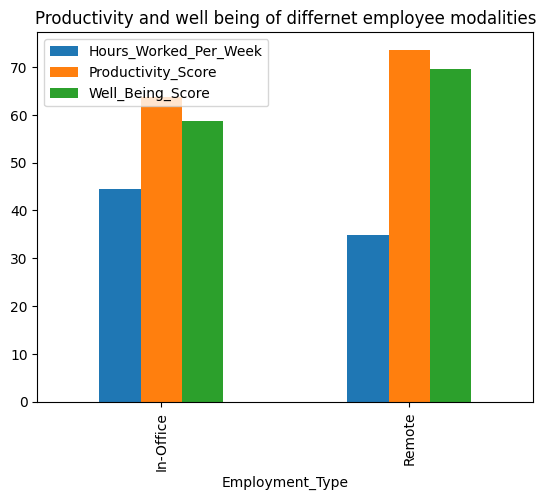

In [12]:
# Here are some visualizations to start to get a feel for the data
productivityVizDf = productiviy_df[['Employment_Type', 'Hours_Worked_Per_Week', 'Productivity_Score', 'Well_Being_Score']].groupby(['Employment_Type'], as_index=False).mean()

productivityVizDf.plot(kind='bar', x='Employment_Type', y=['Hours_Worked_Per_Week', 'Productivity_Score', 'Well_Being_Score'], title='Productivity and well being of differnet employee modalities')

This visualization is comparing in office employees to remote employees in three areas: hours worked per week, prodctivity rating, and wellnes rating
Importaint insights are that the remote employees have the advantage in every area. They are working less time while being more productive and still reporting
higher levels of wellness than in-office employees.

In [13]:
mentalHealthVizOneDf = mental_health_df[['Work_Location', 'Work_Life_Balance_Rating']].groupby(['Work_Location'], as_index=False).mean()

# I used plotly here so that the figure was interactive and the user could scroll over to see the differences
plot = px.bar(mentalHealthVizOneDf, x='Work_Location', y='Work_Life_Balance_Rating', title='Work life balance of different employee modalities')

plot.update_layout(yaxis=dict(range=[1, 5]), width=800)

plot.show()

This visualization is comparing the rating of work life balance for different types of employees. 
It seems to show no significant difference in the work life balance of remote vs in person employess.

In [14]:
mentalHealthVizTwoDf = mental_health_df

# Group data by Work_Location and Stress_Level to get counts
sunburst_data = mentalHealthVizTwoDf.groupby(['Work_Location', 'Stress_Level']).size().reset_index(name='Count')

# Create the sunburst plot
plot = px.sunburst(
    sunburst_data,
    path=['Work_Location', 'Stress_Level'],  # Define the hierarchy
    values='Count',  # Size of each slice
    color='Stress_Level',  # Color by stress level
    color_discrete_map={'High': 'red', 'Medium': 'orange', 'Low': 'green'}  # Custom colors
)

# Update layout for readability
plot.update_layout(
    title="Stress Level Distribution by Work Location",
    margin=dict(t=40, l=0, r=0, b=0)
)

plot.show()

This visualization shows the the breakdown of amount of stress among the differnt work types. They are very similar again, though it is worth noting that onsite has the least "High" stressed individuals and remote has the most. This would suggest that overall it is not a huge difference but working remotly may be slightly more stressful.

In [15]:
mentalHealthVizThreeDf = mental_health_df

# Group data by Work_Location and Productivity_Change to get counts
sunburst_data = mentalHealthVizThreeDf.groupby(['Work_Location', 'Productivity_Change']).size().reset_index(name='Count')

# Create the sunburst plot
plot = px.sunburst(
    sunburst_data,
    path=['Work_Location', 'Productivity_Change'],  # Define the hierarchy
    values='Count',  # Size of each slice
    color='Productivity_Change',  # Color by stress level
    color_discrete_map={'Decrease': 'red', 'No Change': 'grey', 'Increase': 'green'}  # Custom colors
)

# Update layout for readability
plot.update_layout(
    title="Change in productivity by Work Location",
    margin=dict(t=40, l=0, r=0, b=0)
)

plot.show()

This visualization shows the change in productivity bewtween different work modalities. All of them had more decreases than increases but again there do not appear to be significant statistical differances between the categories. It would seem upon cursory analysis that there many not be clear trends about remote work's effects on productivity.

<Axes: xlabel='Percentage point increase in remote workers', ylabel='Excess TFP Growth'>

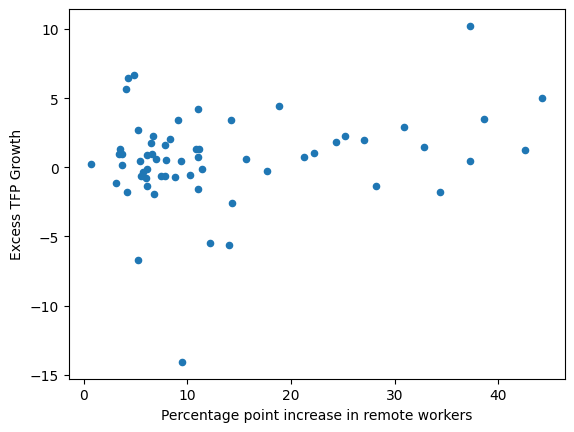

In [16]:
remoteProductivityRelationDf.plot.scatter('Percentage point increase in remote workers', 'Excess TFP Growth')

This chart shows industries that had increased in remote workers durring 2020 and how their excess TFP growth changed. Higher TFP is better for the economy so a corratation between increases in remote workers and TFP could show if remote work tends to be helpful or not. Unfortunatly there does not appear to be a strong corralation either way. Perhapse slightly possitive but not conclusive.

## Machine Learning Plan
- I will try a polynomial regression with remote_work_productivity.csv to predict the productivity of employees
- I am worried that there will not be enough data to train the model well as not all of the data seems to be particularly interlinked
- I will experiment with several different degrees to see if any of them can get a good fit

## Machine Learning Implementation Process


#### Ask

In [17]:
# I will be working with productivity_df

# The employee ID column is not going to be of use to us so lets remove it before we start doing any work with the data
productiviy_df_noID = productiviy_df.drop('Employee_ID', axis=1)

# In this info display we can see that there are no null values
print(productiviy_df_noID.info())

# This describe gives us an idea of the scale of the numerical columns, their ranges are similar and should not need much, if any, adjustment
print(productiviy_df_noID.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Employment_Type        1000 non-null   object
 1   Hours_Worked_Per_Week  1000 non-null   int64 
 2   Productivity_Score     1000 non-null   int64 
 3   Well_Being_Score       1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB
None
       Hours_Worked_Per_Week  Productivity_Score  Well_Being_Score
count            1000.000000         1000.000000       1000.000000
mean               39.720000           68.602000         63.975000
std                 8.042779           12.235494         13.870572
min                16.000000           33.000000         14.000000
25%                34.750000           60.000000         56.000000
50%                40.000000           68.000000         65.000000
75%                45.000000           76.000000         73.0000

#### Prepare

In [18]:
# I am not a SME but I don't see any variables that we need to split the data by so I am going to use a standard test_train_split
train_set, test_set = model_selection.train_test_split(productiviy_df_noID, test_size=.2, random_state=7)

# Lets split the training set into X and Y
productivity_X = train_set.drop('Productivity_Score', axis=1)
productivity_Y = train_set['Productivity_Score'].copy()

print(productivity_X.head())
print('-------------')
print(productivity_Y.head())

    Employment_Type  Hours_Worked_Per_Week  Well_Being_Score
600          Remote                     32                60
80           Remote                     29                54
158          Remote                     31                69
423          Remote                     50                60
747          Remote                     41                73
-------------
600    77
80     84
158    65
423    71
747    65
Name: Productivity_Score, dtype: int64


#### Process

In [19]:
# Start by splitting X into numerical and catagorical
productivity_train_cat = productivity_X[['Employment_Type']]
productivity_train_num = productivity_X.drop('Employment_Type', axis=1)

# As I mentioned above there are no missing values to impute so we are skipping that step

# I don't think this data should need a large amount of scalling but lets do it just in case (and to demonstrate I can)
scaler = StandardScaler()

productivity_train_num_scaled = scaler.fit_transform(productivity_train_num)
productivity_train_num_scaled = pd.DataFrame(productivity_train_num_scaled, columns=productivity_train_num.columns, index=productivity_train_num.index)

print(productivity_train_num_scaled.head())

# Now lets encode the categorical features
print(productivity_train_cat.value_counts())

cat_encoder = OneHotEncoder(sparse_output=True)
productivity_train_cat_encoded = cat_encoder.fit_transform(productivity_train_cat)

cat_encoder.categories_

     Hours_Worked_Per_Week  Well_Being_Score
600              -0.979224         -0.279359
80               -1.356817         -0.713174
158              -1.105088          0.371364
423               1.286333         -0.279359
747               0.153554          0.660574
Employment_Type
In-Office          406
Remote             394
Name: count, dtype: int64


[array(['In-Office', 'Remote'], dtype=object)]

In [20]:
# Now lets do this again in pipline form for reproducability now that we know it works
num_features = productivity_train_num.columns
cat_features = productivity_train_cat.columns

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('one-hot-encoder', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

productivity_X_prepared = full_pipeline.fit_transform(productivity_X)

all_columns = productivity_train_num.columns.tolist() + cat_encoder.categories_[0].tolist()

productivity_X_prepared = pd.DataFrame(productivity_X_prepared, columns=all_columns, index=productivity_X.index)
productivity_X_prepared.head()

,Hours_Worked_Per_Week,Well_Being_Score,In-Office,Remote
600,-0.979224,-0.279359,0.0,1.0
80,-1.356817,-0.713174,0.0,1.0
158,-1.105088,0.371364,0.0,1.0
423,1.286333,-0.279359,0.0,1.0
747,0.153554,0.660574,0.0,1.0


#### Analyze & Evaluate

In [21]:
# Lets split the test data into X & Y and then clean the X
productivity_X_test = test_set.drop('Productivity_Score', axis=1)
productivity_Y_test = test_set[['Productivity_Score']].copy()

productivity_X_test_clean = full_pipeline.transform(productivity_X_test)

# To test many different degrees we will create a function that intakes the degree and then outputs a dictonary with degree and rmse
#   We can then compare to find the one with the lowest rmse
def degreeToRMSE(degree) -> dict:
    poly_reg = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('poly_reg', LinearRegression())
    ])

    poly_reg.fit(productivity_X_prepared, productivity_Y)

    train_prediction = poly_reg.predict(productivity_X_prepared)
    poly_train_mse = mean_squared_error(productivity_Y, train_prediction)
    poly_train_rmse = np.sqrt(poly_train_mse)

    test_prediction = poly_reg.predict(productivity_X_test_clean)
    poly_test_mse = mean_squared_error(productivity_Y_test, test_prediction)
    poly_test_rmse = np.sqrt(poly_test_mse)

    return {'train set RMSE': poly_train_rmse, 'test set RMSE': poly_test_rmse}

In [22]:
# Now we will loop though and create a dictionary containing several potential degrees and their RMSE outputs
rmse_returns = {}
for i in range(1, 11):
    rmse_returns[i] = degreeToRMSE(i)

for key, value in rmse_returns.items():
    print(f'{key} degrees:')
    for key2, value2 in value.items():
        print(f'{key2}: {value2}')

c:\Users\Nicholas Dumford\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\Nicholas Dumford\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\Nicholas Dumford\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\Nicholas Dumford\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\Nicholas Dumford\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but 

1 degrees:
train set RMSE: 11.179404799330738
test set RMSE: 11.23982142721469
2 degrees:
train set RMSE: 11.155926958637616
test set RMSE: 11.254423195943392
3 degrees:
train set RMSE: 11.05867129181114
test set RMSE: 11.29244060789565
4 degrees:
train set RMSE: 10.930322539086331
test set RMSE: 11.410540767749435
5 degrees:
train set RMSE: 10.896785419400489
test set RMSE: 11.639659402582723
6 degrees:
train set RMSE: 10.75396458581392
test set RMSE: 11.581213316059017
7 degrees:
train set RMSE: 10.694476961846526
test set RMSE: 13.058453471427297
8 degrees:
train set RMSE: 10.623945695292988
test set RMSE: 31.965094013246247
9 degrees:
train set RMSE: 10.520011055401767
test set RMSE: 44.20090564647582
10 degrees:
train set RMSE: 10.374491848942881
test set RMSE: 66.18704751630554


c:\Users\Nicholas Dumford\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



The model with only one degree had the best performance with the test set. 
Degrees 2-6 all performed pretty well also, but they were slowly starting to overfit.
After degree 7 the overfitting became obvious.

It would seem that a single degree was the best tested model.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
- https://docs.python.org/3/library/stdtypes.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html 
- https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.plot.html
- https://plotly.com/python/
- ChatGPT

In [23]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 15073 bytes to source.py
